# Student Traces

In [1]:
# Settings and imports.
%matplotlib inline
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates
import seaborn as sns
import data

sns.set()
sns.set_context('poster')
#sns.set_style('whitegrid')
pd.options.display.float_format = '{:.2f}'.format

## Prepare Data

In [2]:
tasks = data.load('robomission-2018-03-10/tasks.csv')
levels = data.load('robomission-2018-03-10/levels.csv')
tasks = tasks.assign(level=tasks.level.apply(
    lambda name: levels[levels.name==name].level.values[0]))

ts = data.load('robomission-2018-03-10/task_sessions.csv')
ts = ts[ts.time_spent > 0]
ts = ts.assign(date=ts.end.str[:10])
ts.time_spent = ts.time_spent.clip_upper(60 * 60)
# Count the order of the task session per student:
ts = ts.assign(order=ts.groupby('student').cumcount() + 1)
# Add cumulative time for each student:
ts = ts.assign(total_time=ts.groupby('student').time_spent.cumsum())
# Add level info
ts = ts.join(tasks.level, on='task')
ts.head()

,student,task,solved,start,end,time_spent,date,order,total_time,level
id,,,,,,,,,,
39,917,26,False,2017-11-13T10:58:19.666306Z,2017-11-13T10:59:21.969801Z,62,2017-11-13,1,62,1
28,584,41,True,2017-11-12T08:57:39.741460Z,2017-11-12T08:58:43.087657Z,63,2017-11-12,1,63,4
13,29,8,True,2017-11-10T12:24:07.602156Z,2017-11-10T12:24:24.986604Z,17,2017-11-10,1,17,2
1,5,25,True,2017-11-10T10:25:08.451949Z,2017-11-10T10:25:22.612931Z,14,2017-11-10,1,14,1
2,29,25,True,2017-11-10T12:19:38.296521Z,2017-11-10T12:19:50.945672Z,12,2017-11-10,2,29,1


## Median time

31


Text(0,0.5,'median time (sec)')

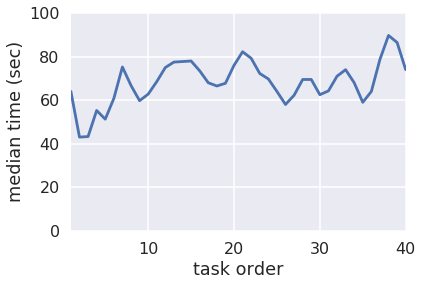

In [40]:
MIN_TASKS = 40
longterm = ts.groupby('student').task.count() >= MIN_TASKS
print(sum(longterm))
longterm.name = 'longterm'
ts.drop('longterm', axis=1, inplace=True, errors='ignore')
ts = ts.join(longterm, on='student')

gr = ts.query('order <= 40 and longterm').groupby('order')
grt = gr.time_spent
ax = grt.median()\
    .rolling(3, min_periods=1, win_type='triang', center=True).mean()\
    .plot()
ax.set_xlim(1, 40)
ax.set_ylim(0, 100)
ax.set_xlabel('task order')
ax.set_ylabel('median time (sec)')

Text(0,0.5,'median time (sec)')

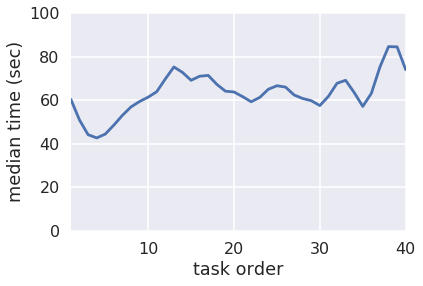

In [16]:
gr = ts[ts.order <= 40].groupby('order')
grt = gr.time_spent
ax = grt.median()\
    .rolling(3, min_periods=1, win_type='triang', center=True).mean()\
    .plot()
ax.set_xlim(1, 40)
ax.set_ylim(0, 100)
ax.set_xlabel('task order')
ax.set_ylabel('median time (sec)')

Text(0,0.5,'median time (sec)')

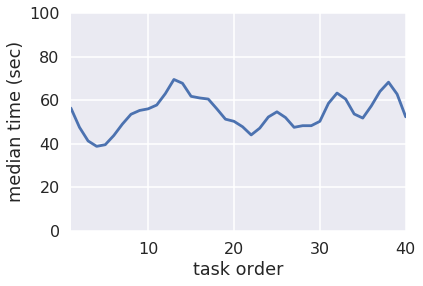

In [42]:
# Explore the effect of unsolved sessions.
gr = ts.query('order <= 40 and solved').groupby('order')
grt = gr.time_spent
ax = grt.median()\
    .rolling(3, min_periods=1, win_type='triang', center=True).mean()\
    .plot()
ax.set_xlim(1, 40)
ax.set_ylim(0, 100)
ax.set_xlabel('task order')
ax.set_ylabel('median time (sec)')